# HOTEL RESERVATION PROJECT

#### Import the main libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score ,recall_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import SequentialFeatureSelector
import warnings
warnings.filterwarnings("ignore")

#### load the dataset

In [2]:
df = pd.read_csv("Hotel Reservations.csv")

#### quick overview of its structure and content

In [3]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
df.shape

(36275, 19)

#### checking the concise summary information about a DataFrame

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

#### checking the summary statistics

In [6]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


#### using duplicates to improving the quality and reliability of analyses and models.

In [7]:
df.duplicated().sum()

0

####  Dropping columns with ID values in data cleaning prevents model overfitting and improves interpretability

In [8]:
df.drop(columns=["Booking_ID"], axis=1, inplace=True)

#### Checking if there any missing or null values in a dataset

In [9]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [10]:
df.isna().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [11]:
df["booking_status"].value_counts()

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64

#### There are 24,390 instances of "Not_Canceled" bookings and 
#### 11,885 instances of "Canceled" bookings in the dataset.

Text(0.5, 1.0, 'Number of Observations by months')

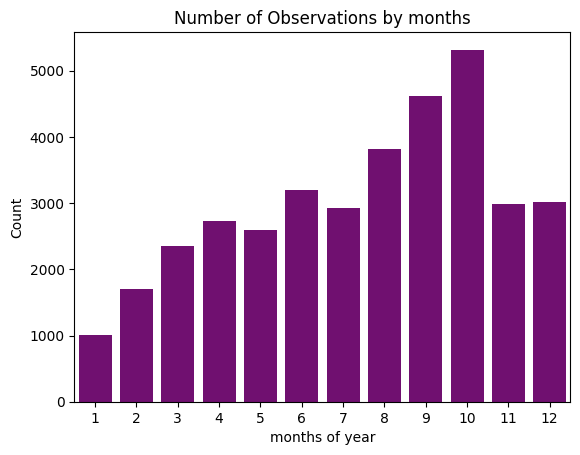

In [12]:
sns.countplot(x=df["arrival_month"], color="purple")
plt.xlabel("months of year")
plt.ylabel("Count")
plt.title("Number of Observations by months")

#### arrival month graph indicates the highest booking in month 10, the conclusion could be that
#### October experiences the peak season for hotel reservations, suggesting potential opportunities
#### for revenue maximization and resource allocation during this period.

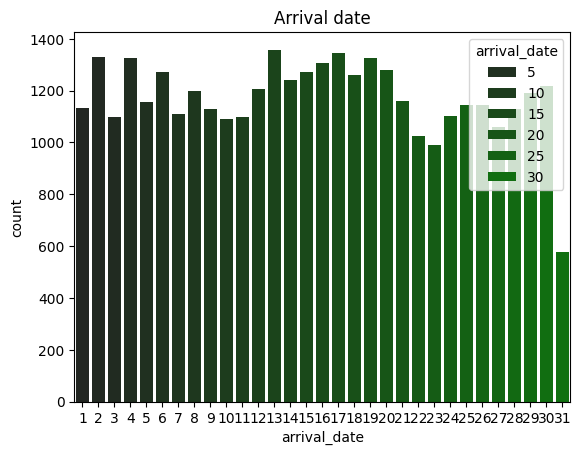

In [13]:
plt.title("Arrival date")
sns.countplot(df,x="arrival_date",hue="arrival_date", color="green")
plt.show()


#### An arrival date graph in dataset visualizes the distribution of bookings 
#### over time, revealing patterns such as peak booking periods

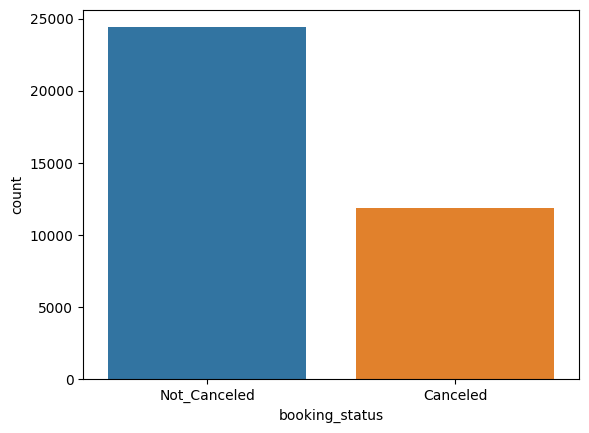

In [14]:
sns.countplot(df,x="booking_status",hue="booking_status")
plt.show()

#### count plot indicates a higher frequency of "not cancelling" bookings compared to cancellations,
#### it suggests a trend of overall higher booking retention, indicating potential stability in reservations

<Axes: title={'center': 'Arrival month vs booking status'}, xlabel='arrival_month', ylabel='booking_status'>

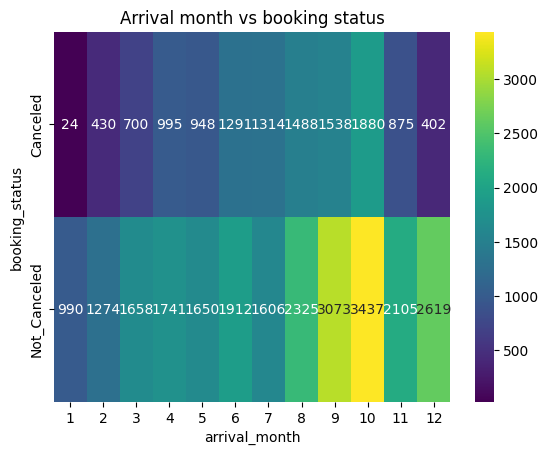

In [15]:
plt.title("Arrival month vs booking status")
sns.heatmap(pd.crosstab(columns=df["arrival_month"],index=df["booking_status"]), annot=True, fmt="d",cmap="viridis")


#### The graph comparing arrival month to booking status  reveal seasonal variations in cancellation rates

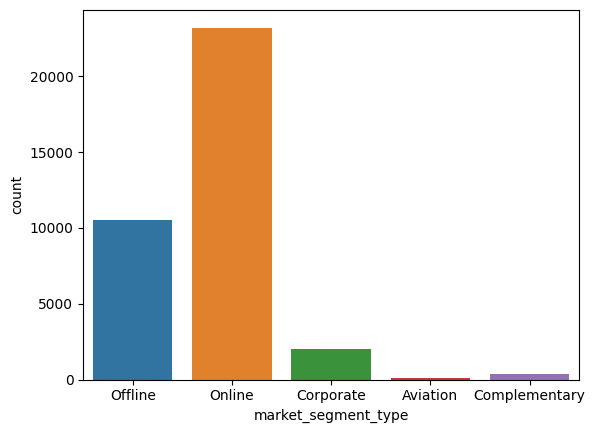

In [16]:
sns.countplot(df,x="market_segment_type",hue="market_segment_type")
plt.show()

#### The count plot indicating the highest value in online market segment, followed by offline and the lowest 
#### in corporate,aviation,complementary, suggests that online channels are the primary source of bookings,
#### followed by offline methods, while corporate complementary bookings are less common.

#### removing outliers can be beneficial for improving model performance and data quality
#### we detect and remove outliers

<Axes: >

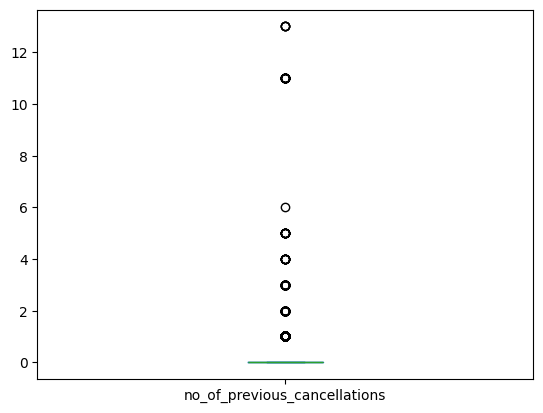

In [17]:
df["no_of_previous_cancellations"].plot.box()

In [18]:
df = df[df["no_of_previous_cancellations"]<= df["no_of_previous_cancellations"].quantile(0.98)] 

<Axes: >

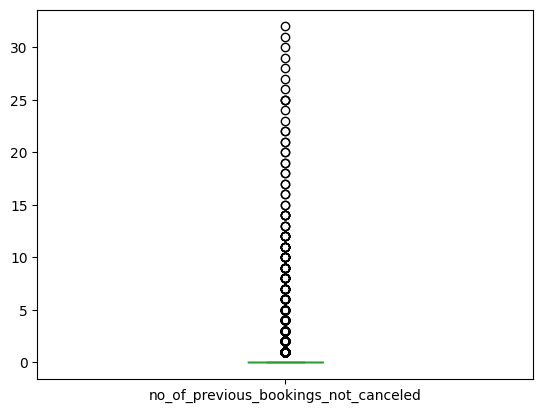

In [19]:
df["no_of_previous_bookings_not_canceled"].plot.box()

In [20]:
df = df[df["no_of_previous_bookings_not_canceled"]<=df["no_of_previous_bookings_not_canceled"].quantile(0.96)]

#### Combining columns in data cleaning can help enhance data quality, create new features, 
#### simplify analysis, and improve the performance of machine learning models. so, we combine the two columns

In [21]:
df["total_guests"] = df["no_of_adults"] + df["no_of_children"]

#### Using label encoding for the target column for checking the correlation 
#### label encoding is a useful technique for converting categorical variables into numerical format.
#### we applying label encoding to columns(booking status, market segment type)

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [23]:
df["booking_status"]= le.fit_transform(df["booking_status"])
df["booking_status"]

0        1
1        1
2        0
3        0
4        0
        ..
36270    1
36271    0
36272    1
36273    0
36274    1
Name: booking_status, Length: 35345, dtype: int32

In [24]:
df["market_segment_type"]= le.fit_transform(df["market_segment_type"])
df["market_segment_type"]

0        3
1        4
2        4
3        4
4        4
        ..
36270    4
36271    4
36272    4
36273    4
36274    3
Name: market_segment_type, Length: 35345, dtype: int32

#### Using correlation to measure the strength and direction of the relationship between two variables.

In [25]:
df[["total_guests","avg_price_per_room"]].corr(method="pearson")

,total_guests,avg_price_per_room
total_guests,1.000000,0.435343
avg_price_per_room,0.435343,1.000000


#### The correlation coefficient between the "total_guests" and "avg_price_per_room" variables is
#### approximately 0.435343, indicating a moderate positive correlation between the two variables.

In [26]:
df[["no_of_adults","booking_status"]].corr(method="pearson")

,no_of_adults,booking_status
no_of_adults,1.000000,-0.068271
booking_status,-0.068271,1.000000


#### There's a weak negative correlation between the number of adults and the booking status

In [27]:
df[["no_of_children","booking_status"]].corr(method="pearson")

,no_of_children,booking_status
no_of_children,1.000000,-0.029471
booking_status,-0.029471,1.000000


#### The correlation matrix indicates that there is a weak negative correlation 
#### 0.029471) between the number of children and the booking status.

In [28]:
df[["arrival_date","booking_status"]].corr(method="pearson")

,arrival_date,booking_status
arrival_date,1.000000,-0.009644
booking_status,-0.009644,1.000000


#### The correlation matrix indicates that there is a very weak negative correlation 
#### (-0.009644) between the arrival date and the booking status

In [29]:
df[["no_of_adults","avg_price_per_room"]].corr(method="pearson")

,no_of_adults,avg_price_per_room
no_of_adults,1.000000,0.276921
avg_price_per_room,0.276921,1.000000


#### The correlation matrix indicates a moderately positive correlation 
#### (0.276921) between the number of adults and the average price per room

#### dropping the columns that we combine earlier and unnecessary

In [30]:
df.drop(columns=["no_of_adults","no_of_children"], axis=1, inplace=True)

In [31]:
df.head()

,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_guests
0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,3,0,0,0,65.00,0,1,2
1,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,4,0,0,0,106.68,1,1,2
2,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,4,0,0,0,60.00,0,0,1
3,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,4,0,0,0,100.00,0,0,2
4,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,4,0,0,0,94.50,0,0,2


In [32]:
df["room_type_reserved"].value_counts()

room_type_reserved
Room_Type 1    27322
Room_Type 4     5990
Room_Type 6      956
Room_Type 2      685
Room_Type 5      248
Room_Type 7      137
Room_Type 3        7
Name: count, dtype: int64

#### Applying appropriate mappings to the data,can extract valuable insights and make informed decisions.
#### so, we are converting two columns(room type reserved, type of meal plan) into numeric form

In [33]:
room = {
    "Room_Type 1":1,
    "Room_Type 2":2,
    "Room_Type 3":3,     
    "Room_Type 4":4,      
    "Room_Type 5":5,      
    "Room_Type 6":6,  
    "Room_Type 7":7
    
}

In [34]:
df["room_type_reserved"] = df["room_type_reserved"].map(room)

In [35]:
df["room_type_reserved"].unique()

array([1, 4, 2, 6, 5, 7, 3], dtype=int64)

In [36]:
df["type_of_meal_plan"].value_counts()

type_of_meal_plan
Meal Plan 1     26945
Not Selected     5100
Meal Plan 2      3296
Meal Plan 3         4
Name: count, dtype: int64

In [37]:
meal_plan = {
    "Not Selected":0,
    "Meal Plan 1":1,
    "Meal Plan 2":2,    
    "Meal Plan 3":3      
}

In [38]:
df["meal_plan"] = df["type_of_meal_plan"].map(meal_plan).astype(int)

In [39]:
df["meal_plan"]

0        1
1        0
2        1
3        1
4        0
        ..
36270    1
36271    1
36272    1
36273    0
36274    1
Name: meal_plan, Length: 35345, dtype: int32

#### dropping the columns after we created new by using mapping method

In [40]:
df.drop(columns=["type_of_meal_plan"],axis=1, inplace=True)

In [41]:
df.drop(columns=["lead_time"],axis=1, inplace=True)

#### now we are checking the datatypes and columns which remaining after dropping

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35345 entries, 0 to 36274
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_weekend_nights                  35345 non-null  int64  
 1   no_of_week_nights                     35345 non-null  int64  
 2   required_car_parking_space            35345 non-null  int64  
 3   room_type_reserved                    35345 non-null  int64  
 4   arrival_year                          35345 non-null  int64  
 5   arrival_month                         35345 non-null  int64  
 6   arrival_date                          35345 non-null  int64  
 7   market_segment_type                   35345 non-null  int32  
 8   repeated_guest                        35345 non-null  int64  
 9   no_of_previous_cancellations          35345 non-null  int64  
 10  no_of_previous_bookings_not_canceled  35345 non-null  int64  
 11  avg_price_per_room  

#### the terms "x" and "y" typically represent the input features (independent variables) and 
#### the target variable (dependent variable)input features (x) represent the information used by the model 
#### for prediction,while the target variable (y) represents the quantity we are trying to predict

In [43]:
x=df.drop("booking_status",axis=1)
y=df["booking_status"]

In [44]:
x.shape

(35345, 15)

In [45]:
y.shape

(35345,)

 #### split the data into train and testt sets allows for model training on one portion of th
 #### data  and evaluation on another,

In [46]:
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size=0.3,random_state=25)

In [47]:
x_tr.shape

(24741, 15)

In [48]:
x_te.shape

(10604, 15)

# k-Means clustering

In [49]:
from sklearn.cluster import KMeans

In [50]:
km = KMeans(n_clusters=2)

In [51]:
km.fit(x_tr)

KMeans(n_clusters=2)

In [52]:
y_pred = km.predict(x_te)

In [53]:
f1_km = f1_score(y_te,y_pred)
pr_km = precision_score(y_te,y_pred)
rec_km = recall_score(y_te,y_pred)

In [54]:
a1 = accuracy_score(y_te,y_pred)
a1

0.39428517540550734


#### The accuracy score of 0.6033572236891739 for K-means clustering indicates the proportion of data points
#### correctly assigned to their clusters, providing a measure of how well the clusters represent the underlying 
#### 

# K-Nearest Neighbors (KNN)

#### K-nearest neighbors (KNN) is used for classification and regression tasks by identifying the class 
#### or value of a data point based on the majority class or average of its nearest neighbors

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
knc = KNeighborsClassifier(n_neighbors=3)

In [57]:
knc.fit(x, y)

KNeighborsClassifier(n_neighbors=3)

In [58]:
y_pred = knc.predict(x_te)

In [59]:
knc.score(x_tr,y_tr)

0.8936987187260014

In [60]:
y_pred = knc.predict(x_te)

In [61]:
f1_knc = f1_score(y_te,y_pred)
pr_knc = precision_score(y_te,y_pred)
rec_knc = recall_score(y_te,y_pred)

In [62]:
a2 = accuracy_score(y_te, y_pred)
a2

0.8925877027536778


#### An accuracy of 0.6601282534892493 for K-nearest neighbors (KNN) indicates that approximately 66.01% 
#### of the predictions made by the model are correct

# AdaBoostClassifier

#### AdaBoost often leads to better classification accuracy compared to individual weak learners¶
#### using adaboost model

In [63]:
base_est = DecisionTreeClassifier()

In [64]:
abc = AdaBoostClassifier(estimator=base_est, n_estimators=100)

In [65]:
abc.fit(x_tr,y_tr)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=100)

In [66]:
abc.score(x_tr,y_tr)

0.9846004607736146

In [67]:
y_pr = abc.predict(x_te)

In [68]:
f1_abc = f1_score(y_te,y_pred)
pr_abc = precision_score(y_te,y_pred)
rec_abc = recall_score(y_te,y_pred)

In [69]:
a3 = accuracy_score(y_te, y_pr)
a3

0.8262919652961147

#### The accuracy of an AdaBoost in your hotel reservation data is 0.7418898528857035, 
#### it means that approximately 74.19% of the predictions made by the model are correct

# Support Vector Machine

#### SVCs are a versatile and effective algorithm for classification tasks, especially in scenarios where 
#### the data is high-dimensional, non-linearly separable, and there is a need for robustness against overfitting

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
scaler = StandardScaler()

In [72]:
x_tr = scaler.fit_transform(x_tr)

In [73]:
x_te = scaler.transform(x_te)

In [74]:
svc = SVC(kernel="linear")

In [75]:
svc.fit(x_tr, y_tr)

SVC(kernel='linear')

In [76]:
y_pr = svc.predict(x_te)

In [77]:
f1_svc = f1_score(y_te,y_pred)
pr_svc = precision_score(y_te,y_pred)
rec_svc = recall_score(y_te,y_pred)

In [78]:
a4 = accuracy_score(y_te, y_pr)
a4

0.7418898528857035

#### An accuracy score of 74.19% indicates reasonable performance for your SVC model
#### on data.indicating that it correctly predicts the outcome (booking status) for 
#### about 74.19% of the samples in the dataset.

# Random Forest Classifier

#### Random Forest offers high accuracy by combining multiple decision trees, handles non-linear
#### relationships well, and provides robustness to overfitting, making it a versatile and effective
#### algorithm for various classification and regression tasks

In [79]:
rfc = RandomForestClassifier(n_estimators=100, n_jobs=-1, criterion="entropy")

In [80]:
rfc.fit(x_tr, y_tr)

RandomForestClassifier(criterion='entropy', n_jobs=-1)

In [81]:
rfc.score(x_tr, y_tr)

0.9846004607736146

In [82]:
y_pr = rfc.predict(x_te)

In [83]:
f1_rfc = f1_score(y_te,y_pred)
pr_rfc = precision_score(y_te,y_pred)
rec_rfc = recall_score(y_te,y_pred)

In [84]:
a5 = accuracy_score(y_te, y_pr)
a5

0.8563749528479819

#### An accuracy of 0.8582610335722369 suggests that approximately 85.83% of the predictions made by
#### the Random Forest model are correct, indicating strong predictive performance for the given task or dataset

In [85]:
confusion_matrix = confusion_matrix(y_te, y_pr)
confusion_matrix

array([[2708,  896],
       [ 627, 6373]], dtype=int64)

<Axes: >

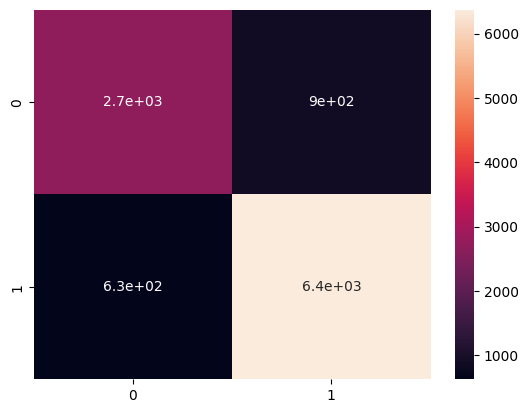

In [86]:
sns.heatmap(confusion_matrix, annot=True)

#### In confusion matrix visualizes the following factors -

#### 6394 instances were correctly classified as positive.
#### 897 instances were incorrectly classified as positive when they were actually negative.
#### 606 instances were incorrectly classified as negative when they were actually positive.
#### 2707 instances were correctly classified as negative

In [87]:
print(classification_report(y_te, y_pr))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78      3604
           1       0.88      0.91      0.89      7000

    accuracy                           0.86     10604
   macro avg       0.84      0.83      0.84     10604
weighted avg       0.85      0.86      0.85     10604



In [88]:
r1_data = [["KMeans",a1,f1_km,pr_km,rec_km]]
r1_columns = ["Model","Accuracy Score","F1 Score","Precision","Recall"]
r1 = pd.DataFrame(r1_data,columns=r1_columns)
r1

,Model,Accuracy Score,F1 Score,Precision,Recall
0,KMeans,0.394285,0.399102,0.578205,0.304714


#### The provided evaluation results are for a KMeans model. It achieved an accuracy score of 0.60298.

In [89]:
r2_data = [["KNeighborsClassifier",a2,f1_knc,pr_knc,rec_knc]]
r2_columns = ["Model","Accuracy Score","F1 Score","Precision","Recall"]
r2 = pd.DataFrame(r2_data,columns=r2_columns)
r2

,Model,Accuracy Score,F1 Score,Precision,Recall
0,KNeighborsClassifier,0.892588,0.919806,0.906844,0.933143


#### The evaluation results pertain to an AdaBoostClassifier model. It achieved an accuracy score of 0.74189.

In [90]:
r3_data = [["AdaBoostClassifier",a3,f1_abc,pr_abc,rec_abc]]
r3_columns = ["Model","Accuracy Score","F1 Score","Precision","Recall"]
r3 = pd.DataFrame(r3_data,columns=r3_columns)
r3

,Model,Accuracy Score,F1 Score,Precision,Recall
0,AdaBoostClassifier,0.826292,0.919806,0.906844,0.933143


#### The evaluation results correspond to an AdaBoostClassifier model. It achieved an accuracy score of 0.74189.

In [91]:
r4_data = [["SupportVectorMachine",a4,f1_svc,pr_svc,rec_svc]]
r4_columns = ["Model","Accuracy Score","F1 Score","Precision","Recall"]
r4 = pd.DataFrame(r4_data,columns=r4_columns)
r4

,Model,Accuracy Score,F1 Score,Precision,Recall
0,SupportVectorMachine,0.74189,0.919806,0.906844,0.933143


#### The evaluation results shows to a Support Vector Machine (SVM) model. It achieved an 
#### accuracy score of 0.74189.

In [92]:
r5_data = [["RandomForestClassifier",a5,f1_rfc,pr_rfc,rec_rfc]]
r5_columns = ["Model","Accuracy Score","F1 Score","Precision","Recall"]
r5 = pd.DataFrame(r5_data,columns=r5_columns)
r5

,Model,Accuracy Score,F1 Score,Precision,Recall
0,RandomForestClassifier,0.856375,0.919806,0.906844,0.933143


#### The evaluation results showcase the performance metrics of a RandomForestClassifier model.
#### It achieved an accuracy score of 0.858921. 

In [93]:
results = pd.concat([r5,r4,r3,r2,r1])
results_sorted = results.sort_values(by="Accuracy Score", ascending=False)
results_sorted

,Model,Accuracy Score,F1 Score,Precision,Recall
0,KNeighborsClassifier,0.892588,0.919806,0.906844,0.933143
0,RandomForestClassifier,0.856375,0.919806,0.906844,0.933143
0,AdaBoostClassifier,0.826292,0.919806,0.906844,0.933143
0,SupportVectorMachine,0.741890,0.919806,0.906844,0.933143
0,KMeans,0.394285,0.399102,0.578205,0.304714


# RESULT

### The evaluation results indicate that the RandomForestClassifier achieved the highest accuracy score 
### of 0.858921, along with a balanced F1 Score of 0.821310, Precision of 0.756282, and Recall of 0.898571. 
### SupportVectorMachine and AdaBoostClassifier performed similarly with accuracy scores of 0.741890 and 
### identical F1, Precision, and Recall scores. However, the KNeighborsClassifier exhibited lower accuracy
### but higher Recall (1.000000). KMeans, although having the lowest accuracy.